# Model training

## Employee Performance Prediction

In this project, we will train our machine learning model using **classification algorithms** in order to predict the **Performance Rating** of employees.  

- The target variable is **`PerformanceRating`**, which takes the values **2, 3, and 4**.  
- Although these are numeric values, they represent **discrete categories (ratings/levels)** rather than continuous numbers.  
- Therefore, this is treated as a **classification problem**.  

## 1.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn ,machine learning and evaluation modeland Warnings Library

In [16]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC

import warnings
warnings.filterwarnings('ignore')	

## Import the CSV Data as Pandas DataFrame

In [18]:
data1=pd.read_csv('new_cleaned_data')

In [19]:
# Returns shape of our dataset
data1.shape

(1200, 24)

In [20]:
# returns overview of the dataset
data1

,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,Male,Marketing,Single,Sales Executive,Travel_Rarely,10,3,4,55,3,...,4,10,2,2,10,7,0,8,No,3
1,Male,Marketing,Single,Sales Executive,Travel_Rarely,14,4,4,42,3,...,4,20,2,3,7,7,1,7,No,3
2,Male,Life Sciences,Married,Sales Executive,Travel_Frequently,5,4,4,48,2,...,3,20,2,3,18,13,1,12,No,4
3,Male,Human Resources,Divorced,Manager,Travel_Rarely,10,4,2,73,2,...,2,23,2,2,21,6,12,6,No,3
4,Male,Marketing,Single,Sales Executive,Travel_Rarely,16,4,1,84,3,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales Executive,Travel_Frequently,3,1,4,71,4,...,2,6,3,3,6,5,0,4,No,4
1196,Male,Life Sciences,Single,Senior Developer,Travel_Rarely,10,2,4,80,4,...,1,4,2,3,1,0,0,0,No,3
1197,Male,Medical,Married,Senior Developer,Travel_Rarely,28,1,4,74,4,...,3,20,3,3,20,8,3,8,No,3
1198,Female,Medical,Single,Data Scientist,Travel_Rarely,9,3,4,46,2,...,2,9,3,4,8,7,7,7,No,3


#### Separate Features and Target  
So  as the model learns from inputs (X) to predict the target (y).  

In [22]:
# Separate features and target
X = data1.drop('PerformanceRating', axis=1)
y = data1['PerformanceRating']


#### Train-Test Split  
To achieve data for training the model and data for testing its performance.  

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape ,X_test.shape

((960, 23), (240, 23))

## 2.) Handling class Imbalance

In [26]:
#Finding the value count for each Performance rating 
y.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

- We notice imbalance in `PerformanceRating` (3: 874, 2: 194, 4: 132).  
- This can affect the model by not feeding it with enough examples of the minority classes. 

In [28]:
# Reviewing the features  that we have .
X.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [29]:
# Segment all types of features
numerical_features = [
     'DistanceFromHome', 'EmpHourlyRate',
    'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

ordinal_features = [
    'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
    'EmpJobLevel', 'EmpWorkLifeBalance', 'EmpJobSatisfaction',
    'EmpRelationshipSatisfaction'
]

nominal_features = [
    'Gender', 'EducationBackground', 'MaritalStatus',
    'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'
]

In [30]:
# Create a copy of X_train to avoid SettingWithCopyWarning
X_train_encoded = X_train.copy()

### Label Encoding Nominal Features  
To convert nominal features into numeric labels, so they can be used with SMOTE-NC for handling class imbalance.  


In [32]:
le_dict = {}
for col in nominal_features:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    le_dict[col] = le

le_dict

{'Gender': LabelEncoder(),
 'EducationBackground': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'EmpJobRole': LabelEncoder(),
 'BusinessTravelFrequency': LabelEncoder(),
 'OverTime': LabelEncoder(),
 'Attrition': LabelEncoder()}

In [33]:
X_train_encoded

,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
331,1,1,0,12,2,23,4,1,88,3,...,12,4,2,3,3,2,2,2,2,0
409,0,3,2,6,2,8,2,4,96,4,...,18,4,8,3,3,3,2,0,2,0
76,1,1,1,13,2,1,2,2,56,3,...,14,4,18,1,2,18,14,4,11,0
868,1,2,2,14,2,22,1,4,50,3,...,19,4,0,2,2,0,0,0,0,1
138,1,4,0,13,2,8,2,3,62,3,...,11,1,10,2,4,8,4,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1,4,1,3,2,8,4,2,77,1,...,11,4,7,4,2,7,7,0,7,1
1095,0,5,2,13,2,12,3,2,83,3,...,11,2,6,6,3,5,4,4,4,0
1130,0,0,0,6,1,23,3,2,43,3,...,15,3,11,2,3,3,2,0,2,1
860,0,3,2,0,2,5,3,3,45,2,...,12,4,14,6,3,11,10,5,8,0


In [34]:
# Get categorical feature indices for SMOTENC
categorical_features = [X_train_encoded.columns.get_loc(col) for col in ordinal_features + nominal_features]
categorical_features


[6, 7, 9, 10, 17, 11, 14, 0, 1, 2, 3, 4, 12, 22]

In [35]:
# Perform SMOTENC resampling
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_sm, y_train_sm = smotenc.fit_resample(X_train_encoded, y_train)


In [36]:
# Checking Dataset Shapes Before and After Resampling
print("Original X_train shape:", X_train.shape)
print("Resampled X_train shape:", X_train_sm.shape)

Original X_train shape: (960, 23)
Resampled X_train shape: (2070, 23)


In [37]:
# Inverse transform nominal features back to original categories
for col in nominal_features:
    X_train_sm[col] = le_dict[col].inverse_transform(X_train_sm[col].astype('int64'))

In [38]:
# Return Xtrain dataset having handled class imbalance 
X_train_sm

,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,Male,Life Sciences,Divorced,Research Scientist,Travel_Rarely,23,4,1,88,3,...,12,4,2,3,3,2,2,2,2,No
1,Female,Medical,Single,Human Resources,Travel_Rarely,8,2,4,96,4,...,18,4,8,3,3,3,2,0,2,No
2,Male,Life Sciences,Married,Sales Executive,Travel_Rarely,1,2,2,56,3,...,14,4,18,1,2,18,14,4,11,No
3,Male,Marketing,Single,Sales Representative,Travel_Rarely,22,1,4,50,3,...,19,4,0,2,2,0,0,0,0,Yes
4,Male,Other,Divorced,Sales Executive,Travel_Rarely,8,2,3,62,3,...,11,1,10,2,4,8,4,7,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Male,Life Sciences,Married,Developer,Travel_Rarely,9,4,3,93,3,...,20,4,6,2,3,4,0,0,3,No
2066,Female,Life Sciences,Single,Laboratory Technician,Travel_Rarely,4,3,3,56,3,...,21,3,8,1,4,3,0,0,2,No
2067,Female,Life Sciences,Married,Developer,Travel_Rarely,11,3,4,89,2,...,20,4,3,4,3,1,0,0,0,No
2068,Male,Life Sciences,Married,Senior Developer,Travel_Rarely,2,3,3,74,3,...,22,4,6,2,3,5,4,0,4,No


##### Concatenating the Xtrain and ytrain after adding more samples 

In [40]:
# creating a duplicate copy
df_balanced= X_train_sm.copy()

In [41]:
df_balanced['PerformanceRating']=y_train_sm
df_balanced.shape

(2070, 24)

In [42]:
# Return the concatenated dataset
df_balanced

,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,Male,Life Sciences,Divorced,Research Scientist,Travel_Rarely,23,4,1,88,3,...,4,2,3,3,2,2,2,2,No,2
1,Female,Medical,Single,Human Resources,Travel_Rarely,8,2,4,96,4,...,4,8,3,3,3,2,0,2,No,3
2,Male,Life Sciences,Married,Sales Executive,Travel_Rarely,1,2,2,56,3,...,4,18,1,2,18,14,4,11,No,3
3,Male,Marketing,Single,Sales Representative,Travel_Rarely,22,1,4,50,3,...,4,0,2,2,0,0,0,0,Yes,3
4,Male,Other,Divorced,Sales Executive,Travel_Rarely,8,2,3,62,3,...,1,10,2,4,8,4,7,7,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Male,Life Sciences,Married,Developer,Travel_Rarely,9,4,3,93,3,...,4,6,2,3,4,0,0,3,No,4
2066,Female,Life Sciences,Single,Laboratory Technician,Travel_Rarely,4,3,3,56,3,...,3,8,1,4,3,0,0,2,No,4
2067,Female,Life Sciences,Married,Developer,Travel_Rarely,11,3,4,89,2,...,4,3,4,3,1,0,0,0,No,4
2068,Male,Life Sciences,Married,Senior Developer,Travel_Rarely,2,3,3,74,3,...,4,6,2,3,5,4,0,4,No,4


In [43]:
df_balanced['PerformanceRating'].value_counts()

PerformanceRating
2    690
3    690
4    690
Name: count, dtype: int64

## 3.)Preprocessing 


In [45]:
# Creating a tool that handles preprocessing for prediction features

preprocess=ColumnTransformer(
    [
        ("nom_fet",OneHotEncoder(drop='first', handle_unknown='ignore'),nominal_features),
        ("num_fet",StandardScaler(),numerical_features),
        ("ord_fet", StandardScaler(), ordinal_features) 
    ]
)

In [46]:
# Preprocessing Train and Test Data    

Xtrain_preprocessed=preprocess.fit_transform(X_train_sm)
Xtest_preprocessed=preprocess.transform(X_test)
Xtrain_preprocessed.shape ,Xtest_preprocessed.shape

((2070, 46), (240, 46))

Fitting on the training set and applying the same transformation to the test set ensures both datasets are processed consistently, preventing data leakage.

In [48]:
# Retrieving Transformed Feature Names  

feature_names=preprocess.get_feature_names_out()
len(feature_names)

46

In [49]:
# Converting Preprocessed Arrays into DataFrames  

X_train_df=pd.DataFrame(Xtrain_preprocessed,columns=feature_names)
X_test_df=pd.DataFrame(Xtest_preprocessed,columns=feature_names)
X_train_df.shape  ,X_test_df.shape

((2070, 46), (240, 46))

In [50]:
# Display All Columns in DataFrame  

pd.set_option('display.max_columns',None)

In [51]:
X_train_df.head()

,nom_fet__Gender_Male,nom_fet__EducationBackground_Life Sciences,nom_fet__EducationBackground_Marketing,nom_fet__EducationBackground_Medical,nom_fet__EducationBackground_Other,nom_fet__EducationBackground_Technical Degree,nom_fet__MaritalStatus_Married,nom_fet__MaritalStatus_Single,nom_fet__EmpJobRole_Data Scientist,nom_fet__EmpJobRole_Delivery Manager,nom_fet__EmpJobRole_Developer,nom_fet__EmpJobRole_Finance Manager,nom_fet__EmpJobRole_Healthcare Representative,nom_fet__EmpJobRole_Human Resources,nom_fet__EmpJobRole_Laboratory Technician,nom_fet__EmpJobRole_Manager,nom_fet__EmpJobRole_Manager R&D,nom_fet__EmpJobRole_Manufacturing Director,nom_fet__EmpJobRole_Research Director,nom_fet__EmpJobRole_Research Scientist,nom_fet__EmpJobRole_Sales Executive,nom_fet__EmpJobRole_Sales Representative,nom_fet__EmpJobRole_Senior Developer,nom_fet__EmpJobRole_Senior Manager R&D,nom_fet__EmpJobRole_Technical Architect,nom_fet__EmpJobRole_Technical Lead,nom_fet__BusinessTravelFrequency_Travel_Frequently,nom_fet__BusinessTravelFrequency_Travel_Rarely,nom_fet__OverTime_Yes,nom_fet__Attrition_Yes,num_fet__DistanceFromHome,num_fet__EmpHourlyRate,num_fet__EmpLastSalaryHikePercent,num_fet__TotalWorkExperienceInYears,num_fet__TrainingTimesLastYear,num_fet__ExperienceYearsAtThisCompany,num_fet__ExperienceYearsInCurrentRole,num_fet__YearsSinceLastPromotion,num_fet__YearsWithCurrManager,ord_fet__EmpEducationLevel,ord_fet__EmpEnvironmentSatisfaction,ord_fet__EmpJobInvolvement,ord_fet__EmpJobLevel,ord_fet__EmpWorkLifeBalance,ord_fet__EmpJobSatisfaction,ord_fet__EmpRelationshipSatisfaction
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.738656,1.059718,-1.089673,-1.269626,0.410867,-0.838851,-0.648514,-0.065251,-0.608214,1.196288,-1.463237,0.331349,-0.885217,0.309010,0.272751,1.206430
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.121622,1.454289,0.405272,-0.422982,0.410867,-0.673509,-0.648514,-0.727356,-0.608214,-0.879417,1.290309,1.984102,-0.885217,0.309010,-0.591865,1.206430
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.989752,-0.518565,-0.591358,0.988093,-1.359154,1.806621,2.683942,0.596854,1.997220,-0.879417,-0.545388,0.331349,0.033739,-1.361094,1.137367,1.206430
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.614637,-0.814493,0.654430,-1.551841,-0.474143,-1.169535,-1.203924,-0.727356,-1.187200,-1.917269,1.290309,0.331349,-0.885217,-1.361094,0.272751,1.206430
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.121622,-0.222637,-1.338831,-0.140767,-0.474143,0.153201,-0.093105,1.590012,0.839249,-0.879417,0.372460,0.331349,0.952696,1.979113,0.272751,-1.518899


## 4.)Model Training and Evaluation

In [53]:
# Defining Classification Models  ### Defining Classification Models  

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
   
}

In [54]:
# Training and Evaluating Models  

Nontuned_model = {}


for modelname, model in models.items():
    model.fit(X_train_df, y_train_sm)
    y_predict = model.predict(X_test_df)

    Nontuned_accuracy = accuracy_score(y_test, y_predict)
    Nontuned_report = classification_report(y_test, y_predict)

    Nontuned_model[modelname]=round(Nontuned_accuracy,2)

    print(modelname)
    print("Model performance for Test set")
    print(f"- accuracy: {Nontuned_accuracy:.4f}")
    print("- classification_report:")
    print(Nontuned_report)   # no formatting, since it’s already text
    print("=" * 35)
    print("\n")


Logistic Regression
Model performance for Test set
- accuracy: 0.7667
- classification_report:
              precision    recall  f1-score   support

           2       0.45      0.69      0.55        29
           3       0.91      0.78      0.84       184
           4       0.54      0.74      0.62        27

    accuracy                           0.77       240
   macro avg       0.63      0.74      0.67       240
weighted avg       0.81      0.77      0.78       240



K-Neighbors Classifier
Model performance for Test set
- accuracy: 0.6000
- classification_report:
              precision    recall  f1-score   support

           2       0.27      0.69      0.39        29
           3       0.89      0.57      0.70       184
           4       0.39      0.70      0.50        27

    accuracy                           0.60       240
   macro avg       0.52      0.65      0.53       240
weighted avg       0.76      0.60      0.64       240



Decision Tree
Model performance for Test 

In [55]:
Nontuned_modeldf = pd.DataFrame(list(Nontuned_model.items()), columns=["Model", "Accuracy"])
Nontuned_modeldf

,Model,Accuracy
0,Logistic Regression,0.77
1,K-Neighbors Classifier,0.60
2,Decision Tree,0.89
3,Random Forest,0.91
4,Gradient Boosting,0.90
5,Support Vector Classifier,0.79


After training the models without any parameter tuning, the **Random Forest Classifier** achieved the best performance with an accuracy score of **92%**.


### Tuning our model with parameters

In [58]:
# Hyperparameter Grids for Model Tuning
params= {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "saga"],   # supports l1 and elasticnet
        "max_iter": [100, 200, 500]
    },

    "K-Neighbors Classifier": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "metric": ["minkowski", "euclidean", "manhattan"]
    },

    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [None, 5, 10, 20, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },

    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },

    "Gradient Boosting": {
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.001, 0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "subsample": [0.5, 0.7, 1.0]
    },

    "Support Vector Classifier": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": ["scale", "auto"]
    },

   
}


### Hyperparameter Tuning and Top 10 Feature Extraction


In [60]:

Tuned_model = {}
top_features = {}  

for modelname, model in models.items():
    # get parameter grid for this model
    parameters = params.get(modelname, {})

    # Hyperparameter tuning
    if parameters:
        rs = RandomizedSearchCV(
            estimator=model,
            param_distributions=parameters,
            n_iter=20,
            cv=5,
            n_jobs=-1,
            random_state=42
        )
        rs.fit(X_train_df, y_train_sm)
        model.set_params(**rs.best_params_)

    # Retrain tuned model
    model.fit(X_train_df, y_train_sm)
    y_predict = model.predict(X_test_df)

    tuned_accuracy = accuracy_score(y_test, y_predict)
    tuned_report = classification_report(y_test, y_predict)

    Tuned_model[modelname] = round( tuned_accuracy,2)
  
     #  Feature importance (if available)
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feat_series = pd.Series(importances, index=X_train_df.columns)
        # Store top 10
        top_features[modelname] = feat_series.sort_values(ascending=False).head(10)
    else:
        print("\nTop 10 features: Not available for this model")
    #  Print results
    print(modelname)
    print("Model performance for Test set")
    print(f"- accuracy: {tuned_accuracy:.4f}")
    print("- classification_report:")
    print(tuned_report)
    print("=" * 50)
    print("\n")



Top 10 features: Not available for this model
Logistic Regression
Model performance for Test set
- accuracy: 0.7625
- classification_report:
              precision    recall  f1-score   support

           2       0.45      0.66      0.54        29
           3       0.89      0.79      0.84       184
           4       0.53      0.67      0.59        27

    accuracy                           0.76       240
   macro avg       0.62      0.71      0.65       240
weighted avg       0.80      0.76      0.77       240




Top 10 features: Not available for this model
K-Neighbors Classifier
Model performance for Test set
- accuracy: 0.6000
- classification_report:
              precision    recall  f1-score   support

           2       0.27      0.59      0.37        29
           3       0.86      0.59      0.70       184
           4       0.37      0.70      0.48        27

    accuracy                           0.60       240
   macro avg       0.50      0.63      0.52       240
weig

In [61]:
Tuned_modeldf = pd.DataFrame(list(Tuned_model.items()), columns=["Model", "Accuracy"])
Tuned_modeldf

,Model,Accuracy
0,Logistic Regression,0.76
1,K-Neighbors Classifier,0.60
2,Decision Tree,0.86
3,Random Forest,0.92
4,Gradient Boosting,0.91
5,Support Vector Classifier,0.82


After tuning, the models did not show significant changes in accuracy, suggesting that the default parameters were already near-optimal for this dataset.


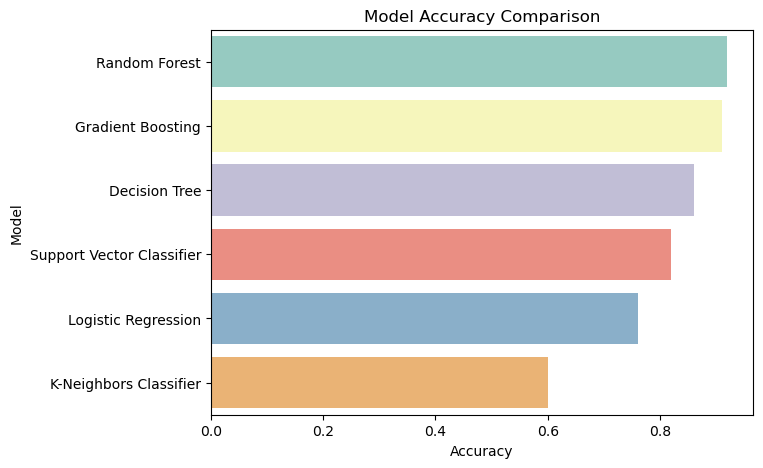

In [63]:
order = Tuned_modeldf.sort_values("Accuracy", ascending=False)["Model"]

plt.figure(figsize=(7,5))
sns.barplot(
    data=Tuned_modeldf,
    y="Model",
    x="Accuracy",
    palette="Set3",
    order=order
)

plt.title("Model Accuracy Comparison")
plt.show()

In [64]:
feature_importancedf=pd.DataFrame(top_features)
feature_importancedf

,Decision Tree,Random Forest,Gradient Boosting
nom_fet__EducationBackground_Life Sciences,0.017836,NaN,NaN
nom_fet__EmpJobRole_Developer,0.037012,0.042874,0.033678
nom_fet__OverTime_Yes,NaN,0.032030,NaN
num_fet__DistanceFromHome,0.013898,NaN,0.026868
num_fet__EmpHourlyRate,0.033545,0.035604,0.034076
num_fet__EmpLastSalaryHikePercent,0.303597,0.228497,0.246429
num_fet__ExperienceYearsAtThisCompany,NaN,0.031258,NaN
num_fet__ExperienceYearsInCurrentRole,0.027888,0.040515,0.039573
num_fet__TotalWorkExperienceInYears,NaN,0.022159,0.017247
num_fet__YearsSinceLastPromotion,0.154605,0.098067,0.142255


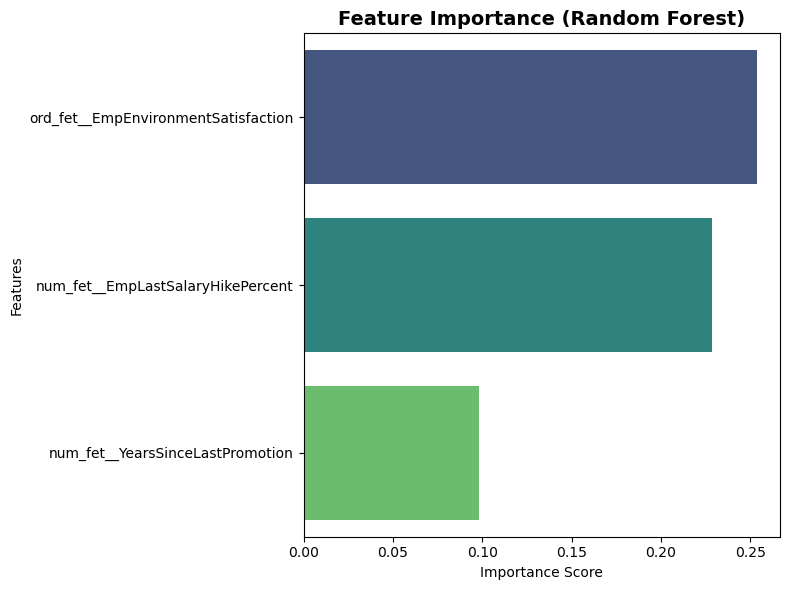

In [65]:
feature_importancedf_sorted = feature_importancedf.sort_values(
    by="Random Forest", ascending=False
).head(3)

plt.figure(figsize=(8,6))
sns.barplot(
    data=feature_importancedf_sorted,
    y=feature_importancedf_sorted.index,
    x="Random Forest",
    palette="viridis"
)

plt.title("Feature Importance (Random Forest)", fontsize=14, weight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### Most Important Features from Tree-Based Models

In [67]:
for col in feature_importancedf.columns:
    print(f"\nTop features for {col}:")
    print(feature_importancedf[col].sort_values(ascending=False).head(3))
    print("=" * 50)
    print("\n")
    


Top features for Decision Tree:
ord_fet__EmpEnvironmentSatisfaction    0.311167
num_fet__EmpLastSalaryHikePercent      0.303597
num_fet__YearsSinceLastPromotion       0.154605
Name: Decision Tree, dtype: float64



Top features for Random Forest:
ord_fet__EmpEnvironmentSatisfaction    0.253922
num_fet__EmpLastSalaryHikePercent      0.228497
num_fet__YearsSinceLastPromotion       0.098067
Name: Random Forest, dtype: float64



Top features for Gradient Boosting:
ord_fet__EmpEnvironmentSatisfaction    0.296338
num_fet__EmpLastSalaryHikePercent      0.246429
num_fet__YearsSinceLastPromotion       0.142255
Name: Gradient Boosting, dtype: float64




### Key Insights from Tree-Based Models  

From the tree-based models, the three most important features identified were:  

- **ord_fet__EmpEnvironmentSatisfaction**  
- **num_fet__EmpLastSalaryHikePercent**  
- **num_fet__YearsSinceLastPromotion**  

## .5) PCA: Reducing Feature Dimensionality  

Applying Principal Component Analysis (PCA) to reduce the number of features in order to check whether fewer components can still capture most of the variance in the data.


In [70]:
# Applying PCA with 2 Components  

pca=PCA(n_components=2)
Xtrainedpca=pca.fit_transform(X_train_df)
Xtestpca=pca.transform(X_test_df)
Xtrainedpca.shape  , Xtestpca.shape

((2070, 2), (240, 2))

In [71]:
# Model Evaluation after PCA  

PCA_tuned_report = {}

for modelname, model in models.items():
    # get parameter grid for this model
    parameters = params.get(modelname, {})

    #  Hyperparameter tuning
    if parameters:
        rs = RandomizedSearchCV(
            estimator=model,
            param_distributions=parameters,
            n_iter=20,
            cv=5,
            n_jobs=-1,
            random_state=42
        )
        rs.fit(Xtrainedpca, y_train_sm)
        model.set_params(**rs.best_params_)

    #  Retrain tuned model
    model.fit(Xtrainedpca, y_train_sm)
    y_predict = model.predict(Xtestpca)

    pca_accuracy = accuracy_score(y_test, y_predict)
    pca_report = classification_report(y_test, y_predict)

    PCA_tuned_report[modelname] = pca_accuracy

    #  Print results
    print(modelname)
    print("Model performance for Test set")
    print(f"- accuracy: {pca_accuracy:.4f}")
    print("- classification_report:")
    print(pca_report)   
    print("=" * 50)
    print("\n")


Logistic Regression
Model performance for Test set
- accuracy: 0.5583
- classification_report:
              precision    recall  f1-score   support

           2       0.27      0.62      0.38        29
           3       0.86      0.51      0.64       184
           4       0.34      0.81      0.48        27

    accuracy                           0.56       240
   macro avg       0.49      0.65      0.50       240
weighted avg       0.73      0.56      0.59       240



K-Neighbors Classifier
Model performance for Test set
- accuracy: 0.5250
- classification_report:
              precision    recall  f1-score   support

           2       0.24      0.55      0.33        29
           3       0.83      0.50      0.62       184
           4       0.30      0.67      0.41        27

    accuracy                           0.53       240
   macro avg       0.45      0.57      0.45       240
weighted avg       0.70      0.53      0.56       240



Decision Tree
Model performance for Test 

## Impact of PCA on Model Performance  

After training the models with PCA, the performance turned out to be lower compared to training without PCA.  
This shows that applying PCA reduces the feature space by compressing information into fewer components, which may discard important details that were useful for classification.  
Hence, PCA did not improve accuracy in this case.


## 6.) Neural Network Model Training and Prediction

### Transforming Target Labels for Neural Network

Neural Networks require the target labels (`y_train`) in **one-hot encoded** format for classification.  
We will first **Label Encode** them into integers, and then convert those integers into **One-Hot Vectors**.


In [75]:
#  Label Encoding Target Variables

le=LabelEncoder()
y_train_int=le.fit_transform(y_train_sm)
y_test_int=le.transform(y_test)
y_train_int.shape

(2070,)

In [76]:
y_train_int

array([0, 1, 1, ..., 2, 2, 2], dtype=int64)

In [77]:
# unique classes after label encoding
np.unique(y_train_int)

array([0, 1, 2], dtype=int64)

### One-Hot Encoding Target Labels

In [79]:
# to categorical helps to encode the y target


y_train_encoded=to_categorical(y_train_int,num_classes=len(np.unique(y_train_int)))
y_test_encoded=to_categorical(y_test_int,num_classes=len(np.unique(y_test_int)))
y_train_encoded.shape

(2070, 3)

After encoding, each class is represented as an array of length equal to the number of unique classes.  
A `1` marks the true class, and `0`s elsewhere, creating a **2D array** of shape `(num_samples, num_classes)

In [81]:
# Display a few samples of the original labels and their one-hot encoded versions

print('original\n',y_train_sm[:5])
print('encoded\n',y_train_encoded[:5])

original
 0    2
1    3
2    3
3    3
4    3
Name: PerformanceRating, dtype: int64
encoded
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [82]:
# Initializing our deep learning model
model=Sequential([
    Dense(64,activation='relu',input_dim=X_train_df.shape[1]),
    Dense(32,activation='relu'),
    Dense(3,activation='softmax')
])

In [83]:
#Cross entropy checks if your model is improving
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
# Train the model for 50 epochs with batch size 32 and 20% validation split
history = model.fit(X_train_df, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5296 - loss: 0.9801 - val_accuracy: 0.0121 - val_loss: 1.4001
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7367 - loss: 0.6398 - val_accuracy: 0.5556 - val_loss: 0.8674
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8345 - loss: 0.4480 - val_accuracy: 0.8309 - val_loss: 0.4964
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8732 - loss: 0.3528 - val_accuracy: 0.8478 - val_loss: 0.4482
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.3061 - val_accuracy: 0.9058 - val_loss: 0.3124
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9028 - loss: 0.2742 - val_accuracy: 0.8961 - val_loss: 0.3531
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2462 - val_accuracy: 0.9179 - val_loss: 0.2783
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9215 - loss: 0.2279 - val_accuracy: 0.9034 - val_loss:

In [85]:
# Evaluating the model performance
loss,accuracy=model.evaluate(X_test_df,y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8042 - loss: 0.8385 
Test Loss: 0.8385
Test Accuracy: 80.42%


# Model Performance

After training our Neural Network, we achieved:

- **Test Loss:** 0.8765  
- **Test Accuracy:** 82.50%  

✅ This shows the Neural Network performs well, but slightly below the performance we obtained from our previous models like the Random Forest model.
